# Regression Challenge

Predicting the selling price of a residential property depends on a number of factors, including the property age, availability of local amenities, and location.

In this challenge, you will use a dataset of real estate sales transactions to predict the price-per-unit of a property based on its features. The price-per-unit in this data is based on a unit measurement of 3.3 square meters.

> **Citation**: The data used in this exercise originates from the following study:
>
> *Yeh, I. C., & Hsu, T. K. (2018). Building real estate valuation models with comparative approach through case-based reasoning. Applied Soft Computing, 65, 260-271.*
>
> It was obtained from the UCI dataset repository (Dua, D. and Graff, C. (2019). [UCI Machine Learning Repository](http://archive.ics.uci.edu/ml). Irvine, CA: University of California, School of Information and Computer Science).

## Review the data

Run the following cell to load the data and view the first few rows.

In [11]:
import pandas as pd

# load the training dataset
data = pd.read_csv('data/real_estate.csv')
data.head()

,transaction_date,house_age,transit_distance,local_convenience_stores,latitude,longitude,price_per_unit
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


The data consists of the following variables:

- **transaction_date** - the transaction date (for example, 2013.250=2013 March, 2013.500=2013 June, etc.)
- **house_age** - the house age (in years)
- **transit_distance** - the distance to the nearest light rail station (in meters)
- **local_convenience_stores** - the number of convenience stores within walking distance
- **latitude** - the geographic coordinate, latitude
- **longitude** - the geographic coordinate, longitude
- **price_per_unit** house price of unit area (3.3 square meters)

## Train a Regression Model

Your challenge is to explore and prepare the data, identify predictive features that will help predict the **price_per_unit** label, and train a regression model that achieves the lowest Root Mean Square Error (RMSE) you can achieve (which must be less than **7**) when evaluated against a test subset of data.

Add markdown and code cells as required to create your solution.

> **Note**: There is no single "correct" solution. A sample solution is provided in [02 - Real Estate Regression Solution.ipynb](02%20-%20Real%20Estate%20Regression%20Solution.ipynb).

# Solution - Training regression model

In [12]:
print(data.shape)

(414, 7)


In [13]:
data.describe()

,transaction_date,house_age,transit_distance,local_convenience_stores,latitude,longitude,price_per_unit
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


From the looks of it, we can make following observations from the summary:
1. There are no null values in any column.
2. The transaction date column seems to range from August 2012 to July 2013 i.e. data is for a year grouped by month.

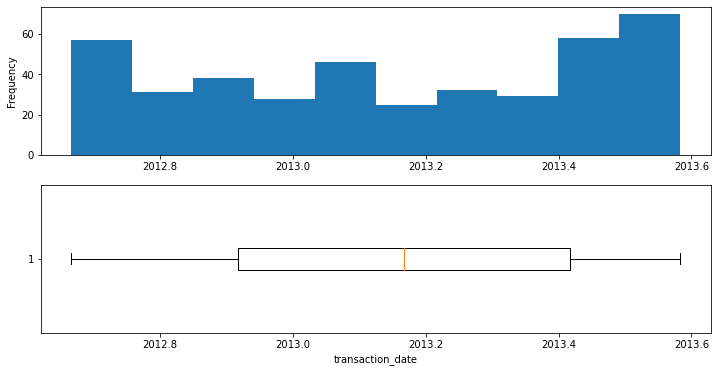

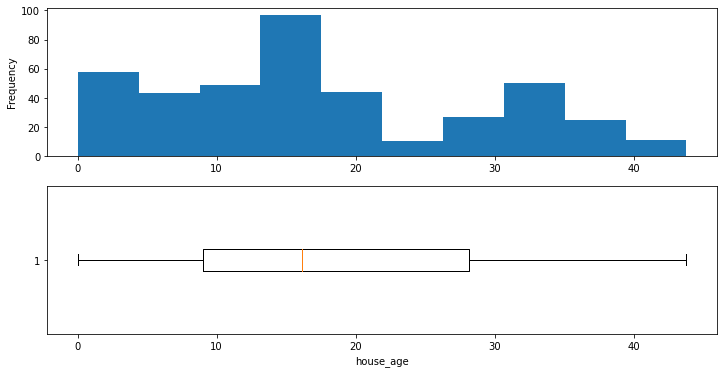

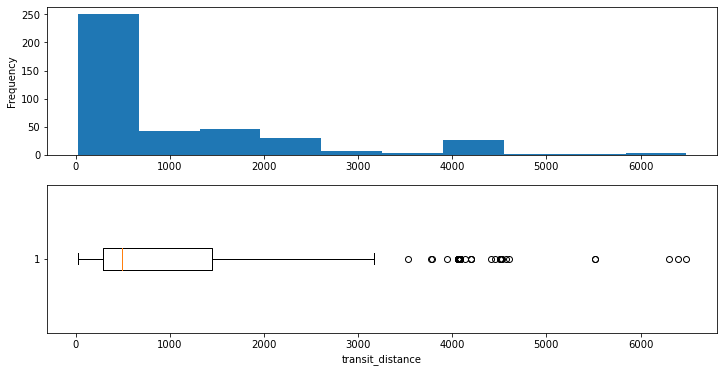

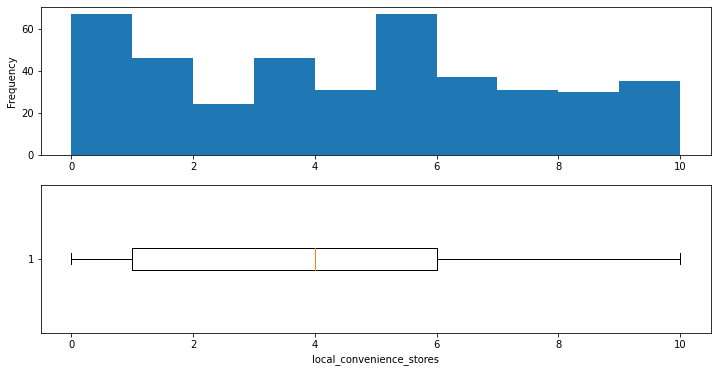

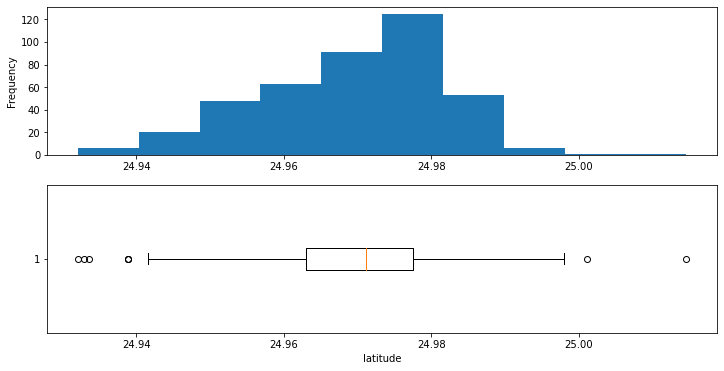

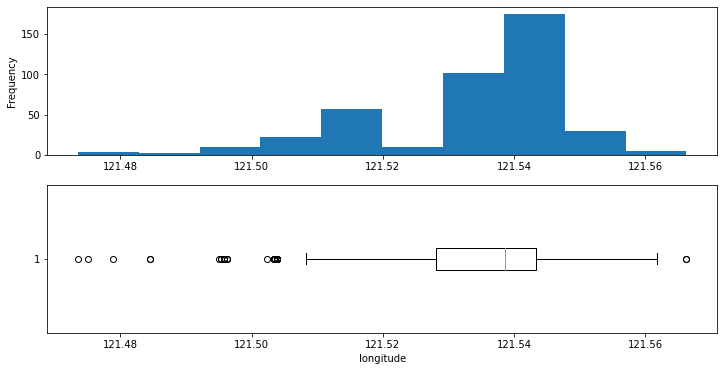

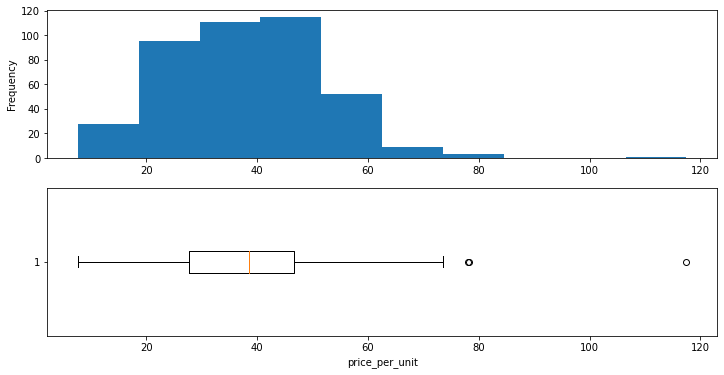

In [14]:
import matplotlib.pyplot as plt

def show_distribution (data, col_name):
    fig, ax = plt.subplots(2, 1, figsize = (12,6))

    ax[0].hist(data)
    ax[0].set_ylabel('Frequency')

    # Plot the boxplot   
    ax[1].boxplot(data, vert=False)
    ax[1].set_xlabel(col_name)

for col in data.columns:
    show_distribution(data[col],col)

From the distribution shown above, clearly price_per_unit has outliers, but so does transit distance. However, the histogram shows that there are about 40-50 data points that flag as outliers in transit distance, so no action taken for them.

In [20]:
data = data[data['price_per_unit']< data['price_per_unit'].quantile(0.999) ]

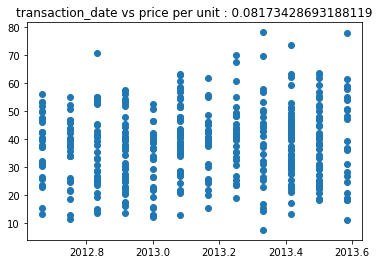

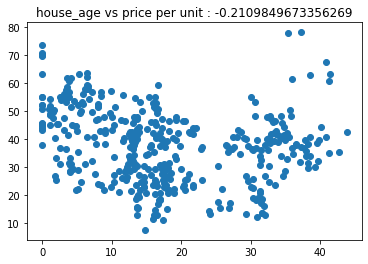

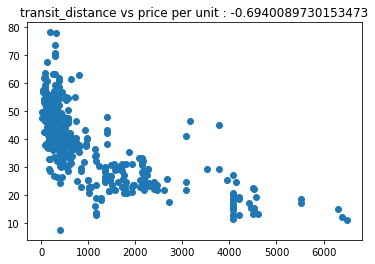

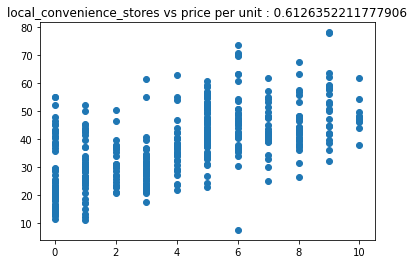

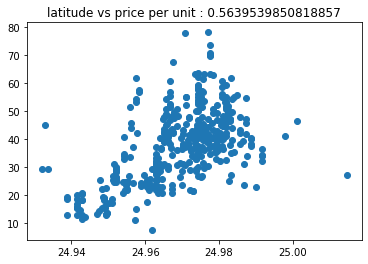

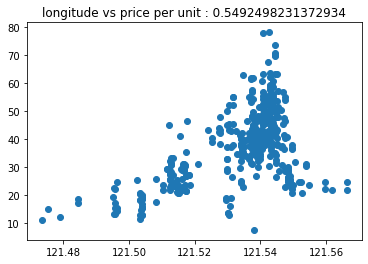

In [48]:
# Since all data is in numeric form, we use all columns to check correlation. But transaction data is technically ordinal categorical

features = data.columns[:-1].values
label = data['price_per_unit']
for col in features:
    plt.scatter(x=data[col],y=label)
    corr_value = data[col].corr(label)
    plt.title(col+" vs price per unit : "+str(corr_value))
    plt.show()
    

From the above graphs, it seems like price per unit has high correlation with latitude, longitude, local_convenience_stores and transit distance. Although, latitude and longitude by themselves do not seem to make sense that it impacts the price directly. As shown in the image below, few latitudes and longitudes are densely populated, with high likelihood of higher price_per_unit.

<AxesSubplot:xlabel='latitude', ylabel='longitude'>

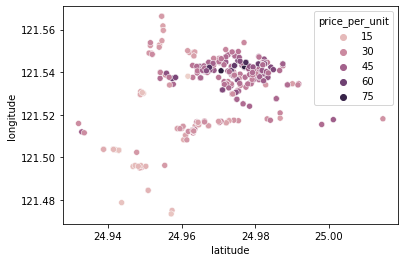

In [51]:
import seaborn as sns
sns.scatterplot(data = data, x='latitude',y='longitude', hue = 'price_per_unit')


In [52]:
data[features].corr()

,transaction_date,house_age,transit_distance,local_convenience_stores,latitude,longitude
transaction_date,1.000000,0.018528,0.061988,0.011321,0.034373,-0.040805
house_age,0.018528,1.000000,0.024676,0.048131,0.055119,-0.048822
transit_distance,0.061988,0.024676,1.000000,-0.605328,-0.590805,-0.807079
local_convenience_stores,0.011321,0.048131,-0.605328,1.000000,0.445994,0.449239
latitude,0.034373,0.055119,-0.590805,0.445994,1.000000,0.413249
longitude,-0.040805,-0.048822,-0.807079,0.449239,0.413249,1.000000


Since the few variables show high correlation between the independent variable pairs longitude and transit_distance, latitude and transit_distance, and local_convenience_stores and transit_distance, there is very high chance of multicollinearity making linear regression a bad choice for this data unless we remove this multicollinearity.

In [53]:
x,y = data[features], data['price_per_unit']

In [58]:
from sklearn.model_selection import train_test_split
import numpy as np

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state=0)
print ('Training Set: %d rows\nTest Set: %d rows' % (x_train.shape[0], x_test.shape[0]))

Training Set: 289 rows
Test Set: 124 rows


In [59]:
from sklearn.metrics import mean_squared_error, r2_score
def test_model(regressor):
    model = regressor.fit(x_train,y_train)
    print(model,"\n")
    #Evaluate the model using the test data
    predictions = model.predict(x_test)
    mse = mean_squared_error(y_test, predictions)
    print("MSE:", mse)
    rmse = np.sqrt(mse)
    print("RMSE:", rmse)
    
    r2 = r2_score(y_test, predictions)
    print("R2:", r2)
    
    # Plot predicted vs actual
    plt.scatter(y_test, predictions)
    plt.xlabel('Actual Labels')
    plt.ylabel('Predicted Labels')
    z = np.polyfit(y_test, predictions, 1)
    p = np.poly1d(z)
    plt.plot(y_test,p(y_test), color='magenta')
    plt.show()
    


LinearRegression() 

MSE: 59.84927334481062
RMSE: 7.73623121066134
R2: 0.6353895394516527


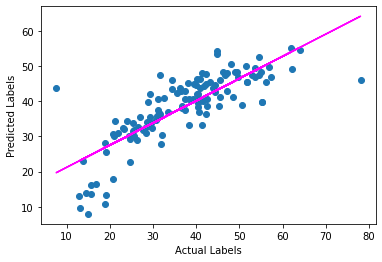

In [68]:
from sklearn.linear_model import LinearRegression
lr1 = LinearRegression()
test_model(lr1)

Lasso() 

MSE: 62.1721929376688
RMSE: 7.884934555065679
R2: 0.6212379761120413


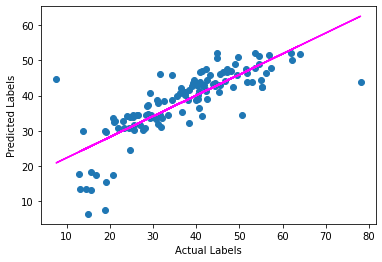

In [69]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso()
test_model(lasso_reg)

GradientBoostingRegressor() 

MSE: 33.83812487741325
RMSE: 5.8170546565605905
R2: 0.7938532315243907


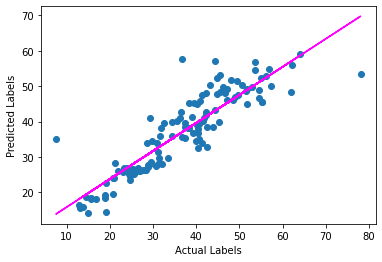

In [70]:
from sklearn.ensemble import GradientBoostingRegressor
gb_reg = GradientBoostingRegressor()
test_model(gb_reg)

DecisionTreeRegressor() 

MSE: 81.35941532258066
RMSE: 9.019945416829342
R2: 0.5043466322505896


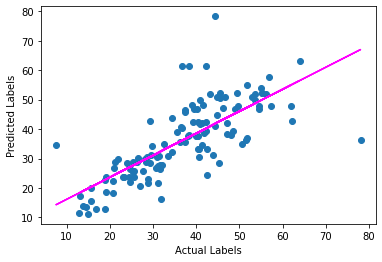

In [71]:
from sklearn.tree import DecisionTreeRegressor
dt_reg = DecisionTreeRegressor()
test_model(dt_reg)

RandomForestRegressor() 

MSE: 39.07292946422992
RMSE: 6.250834301453681
R2: 0.7619620421312729


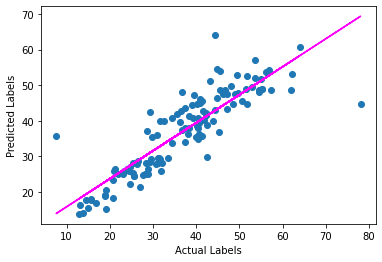

In [73]:
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor()
test_model(rf_reg)

From above model runs, it is clear that Gradient boosting regressor and Random forest regressor works best for the data.

In [89]:
import joblib

# Save the model as a pickle file
filename1 = './real_estate-gb_reg.pkl'
joblib.dump(gb_reg, filename1)


['./real_estate-gb_reg.pkl']

In [90]:

filename2 = './real_estate-rf_reg.pkl'
joblib.dump(rf_reg, filename2)


['./real_estate-rf_reg.pkl']

## Use the Trained Model

Save your trained model, and then use it to predict the price-per-unit for the following real estate transactions:

| transaction_date | house_age | transit_distance | local_convenience_stores | latitude | longitude |
| ---------------- | --------- | ---------------- | ------------------------ | -------- | --------- |
|2013.167|16.2|289.3248|5|24.98203|121.54348|
|2013.000|13.6|4082.015|0|24.94155|121.50381|

# Solution - Using Trained model for predictions

In [91]:
x_new = np.array([[2013.167,16.2,289.3248,5,24.98203,121.54348],
                 [2013.000,13.6,4082.015,0,24.94155,121.50381]])

In [92]:
model1 = joblib.load(filename1)
model2 = joblib.load(filename2)

In [93]:
model1.predict(x_new)


array([49.27453926, 16.4824198 ])

In [94]:
model2.predict(x_new)

array([48.631     , 15.70133333])